In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.metrics import AUC, Recall
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, \
     roc_curve, roc_auc_score

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _tenor_lmsc import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target
# Note that records are read from pickle, selected, filtered,
# and scaled with `sklearn.preprocessing.StandardScaler` 
# in `_tenor_lmsc.py`.

In [13]:
x_train, x_test, y_train, y_test = \
     train_test_split(data, target,
                      test_size=TEST_SIZE,
                      random_state=RANDOM_SEED)

In [14]:
# Reshape for input to 2D convolutional layer
x_train = x_train.reshape(x_train.shape[0], BANDS, TIME_SLICES, 1)
x_test = x_test.reshape(x_test.shape[0], BANDS, TIME_SLICES, 1)

In [15]:
dependencies = {
    'recall': Recall
}

fn = './data/keras_models/tenor_cnn/tenor_cnn_F.h5'
model = load_model(fn, custom_objects=dependencies, compile=False)

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])

In [17]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))
# @ 3 Epochs
# Recall: 83.33
# Accuracy: 87.72
# @ 6 Epochs
# Recall: 94.61
# Accuracy: 93.02
# @ 12 Epochs
# Recall: 95.59
# Accuracy: 91.96

1132/1132 [==============================] - 6s 5ms/step
Recall: 95.59
Accuracy: 91.96


In [22]:
probas_pred = model.predict_proba(x_test)

In [29]:
y_true = [1 if x == '1' else 0 for x in y_test]

In [31]:
precision, recall, threshold = precision_recall_curve(y_true, probas_pred)

Text(0.5, 1.0, 'Precision-Recall Curve')

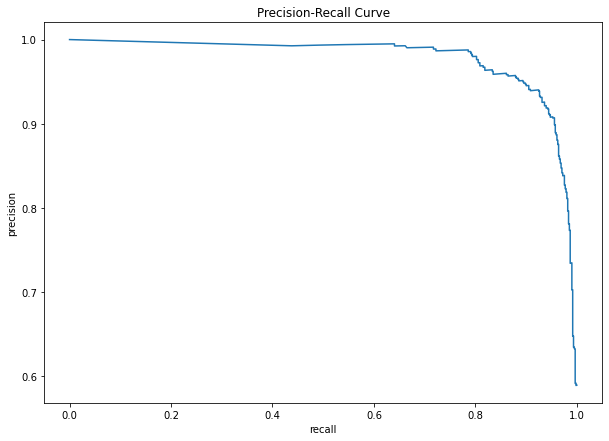

In [35]:
fig = plt.figure(figsize=(10, 7))    
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve")


In [51]:
fpr, tpr, threshold = roc_curve(y_true, probas_pred)
auc = roc_auc_score(y_true, probas_pred)

0.9730910633484163

Text(0.5, 1.0, 'ROC Curve: AUC = 0.973')

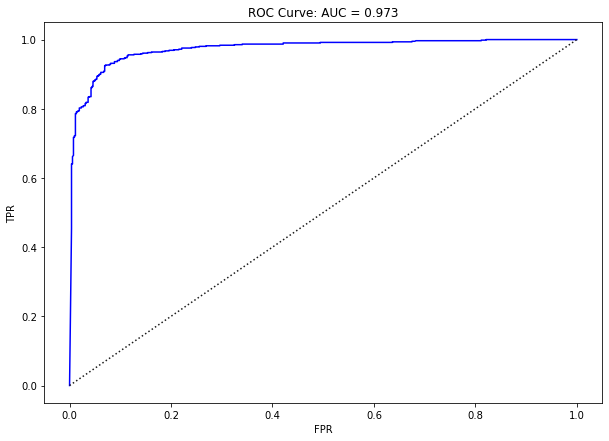

In [55]:
fig = plt.figure(figsize=(10, 7))    
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], ':', color='0.1')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve: AUC = {:.3f}".format(auc)) 